In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

*Create clearly separable 4-blobs in 3d but also a ’disaster’ realization with strong overlaps. Study, show and compare elbow plots and prediction boundaries.*

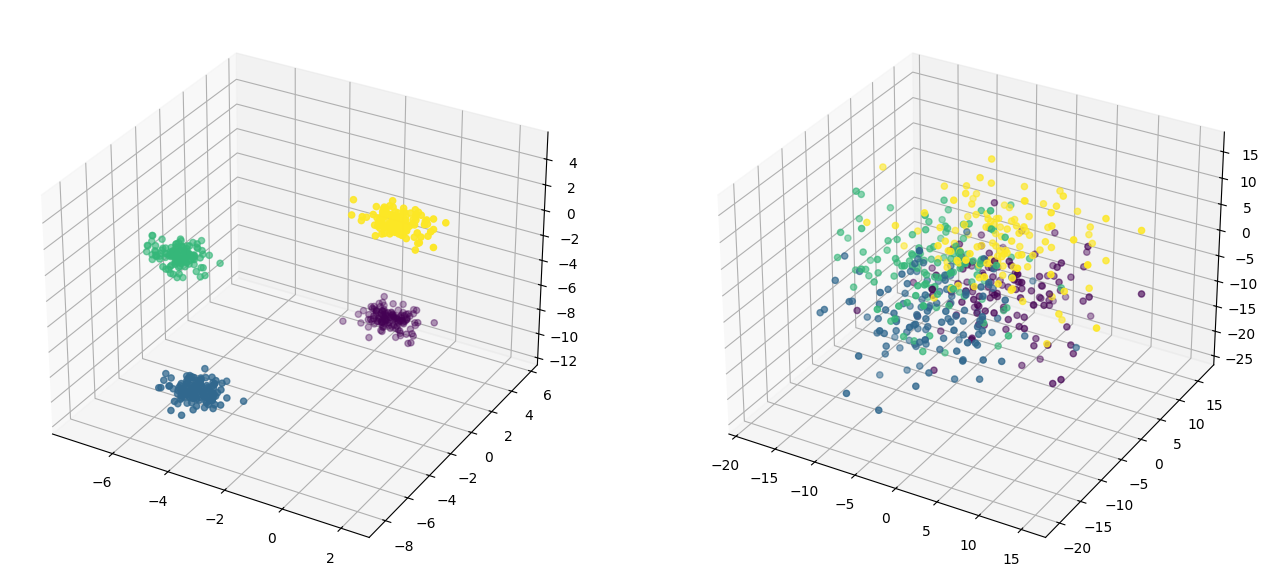

In [28]:
## Step 1 - create blob
# clearly separable
X_separable, y_separable = make_blobs(
    n_samples=500,
    n_features=3,
    centers=4,
    cluster_std=0.5,
    random_state=1
)
# disaster
X_disaster, y_disaster = make_blobs(
    n_samples=500,
    n_features=3,
    centers=4,
    cluster_std=5,
    random_state=1
)

## Step 2 - make a visualisation
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_separable[:, 0], X_separable[:, 1], X_separable[:, 2], c=y_separable)

ax_disaster= fig.add_subplot(122, projection='3d')
ax_disaster.scatter(X_disaster[:, 0], X_disaster[:, 1], X_disaster[:, 2], c=y_disaster)
plt.show()

### PCA

In [32]:
X_train_sep, X_test_sep, y_train_sep, y_test_sep = train_test_split(X_separable, y_separable,
                                                                    test_size=0.2, stratify=y_separable)
sc = StandardScaler()

# Normalize test data set with mu/sigma of training data
X_train_std = sc.fit_transform(X_train_sep)
X_test_std = sc.transform(X_test_sep)

In [36]:
X_train_sep.shape

(400, 3)

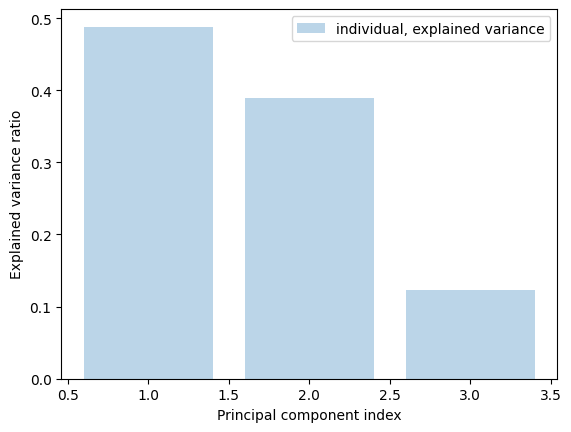

In [37]:
cov_mat = np.cov(X_train_std.T) #cov matrix from data
EVal, EVec = np.linalg.eig(cov_mat)

# Calculate (sum of) explained variances
sum_EVal = sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]

# Plot explained variances
plt.bar(range(1,4), var_exp, alpha=0.3, 
        align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [39]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(EVal[i]), EVec[:, i]) for i in range(len(EVal))]

# Sort the (EVal, EVec) tuples from high to low (reverse), key=EV
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [40]:
X_train_pca = X_train_std.dot(w)
print (X_train_std.shape, w.shape)

(400, 3) (3, 2)


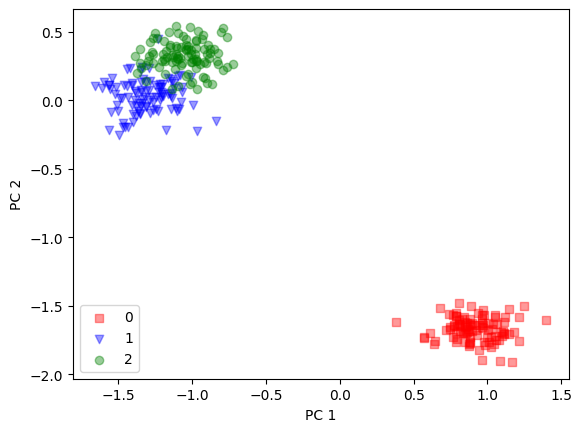

In [41]:
# Visualize the data
colors = ['r', 'b', 'g']
markers = ['s', 'v', 'o']
#
for l, c, m in zip(np.unique(y_train_sep), colors, markers):
    plt.scatter(X_train_pca[y_train_sep==l, 0], # Pick x component for label
                X_train_pca[y_train_sep==l, 1], 
                color=c, label=l, marker=m, alpha=0.4) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()